# 0. Importing all necessary packages

In [1]:
import numpy as np
import sympy as sm
import scipy as sp
import time

from scipy             import interpolate, optimize
from sympy.interactive import printing
from matplotlib        import cm
from mpl_toolkits      import mplot3d
printing.init_printing(use_latex=True)

%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets        as widgets

print('Import successful.')

Import successful.


# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & \begin{cases}
w h_2 & 
\text{if }l_2 = 1  \\
b & \text{if }l_2 = 0 
\end{cases} \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_{1}& = & \begin{cases}
w h_1 & 
\text{if }l_1 = 1  \\
b & \text{if }l_1 = 0 
\end{cases} \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [2]:
rho   = 2
beta  = 0.96
gamma = 0.1
w     = 2
b     = 1
Delta = 0.1

print('Parameters successfully set.')

Parameters successfully set.


The **relevant levels of human capital** are:

In [3]:
h_vec = np.linspace(0.1,1.5,10000) 

print('Relevant levels of human capital sucessfully set.')

Relevant levels of human capital sucessfully set.


**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

Firstly, we define the labour function, **l**.

In [4]:
l = [0, 1] # Defines labour, l, as being either 0 (no work) or 1 (work)

Then, we define the value function of period 2, **vf2**, with the help of functions for consumption, utility and disutility - named **cons**, **util** and **disutil**, respectively. These three are created independent of period, **t**, so they can be used later on.

In [5]:
def cons(w,b,h,l): # Defines a function for consumption, cons
    if l == 0:     # If she does not work,
        c = b      # her consumption will equal her unemployment benefits, b
    elif l == 1:   # If she does work,
        c = w*h    # her consumption will equal her wage times her human capital
    return c

def util(w,b,h,l,rho):                    # Utility from consumption, util
    return (cons(w,b,h,l)**(1-rho))/(1-rho)

def disutil(gamma,l):                     # Disutility from work, disutil
    return gamma*l

def vf2(w,b,h2,l2,rho,gamma):             # Value function of period 2, vf2
    return util(w,b,h2,l2,rho) - disutil(gamma,l2)

print('Defining successful.')

Defining successful.


Next, we create a function, **sol_2**, as to solve the worker's problem in period 2.

**NOTE:** Here, we extend the *num* argument of *linspace* from 100 to 10.000, so we obtain a more precise solution.

In [6]:
def sol_2(w,b,rho,gamma):
    
    # Creates empty arrays for each for the variabels
    h2_vec  = np.linspace(0.1,1.5,10000)
    l2_vec  = np.empty(10000)
    c2_vec  = np.empty(10000)
    vf2_vec = np.empty(10000)
    
    # Solves for each relevant level of human capital, h2_vec
    for i,h2 in enumerate(h2_vec):
        
        vf2_0 = vf2(w,b,h2,l[0],rho,gamma)  # vf2 if no work
        vf2_1 = vf2(w,b,h2,l[1],rho,gamma)  # vf2 if working
        vf2_vec[i] = max(vf2_0,vf2_1)       # Selectes the maximum of the above
        l2_vec[i]  = vf2_1 > vf2_0          # Selectes the relevant labour values
        c2_vec[i]  = cons(w,b,h2,l2_vec[i]) # Selectes the relavent consumption values
        
    return h2_vec, vf2_vec, l2_vec, c2_vec

# Solves for the values of the vectors according to the definitions above
h2_vec,vf2_vec,l2_vec,c2_vec = sol_2(w,b,rho,gamma)

print('Solved successfully.')

Solved successfully.


We now plot the solution of the worker's problem, i.e. we plot labour, consumption and utility - all as a function of $h_{2}$. We also print the cut-off value of $h_{2}$.

She will work whenever h₂ ≥ 0.5556.

Revelant graphs of period 2 are shown below.


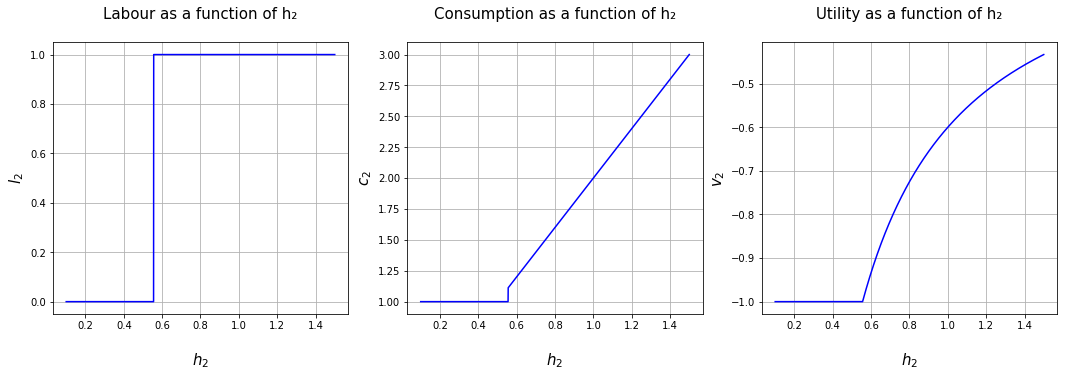

In [7]:
fig = plt.figure(figsize=(18,5))  # Initializes plot

ax1 = fig.add_subplot(1,3,1)      # Initializes first subplot
ax1.plot(h2_vec,l2_vec, 'b-')     # Plots the relevant series
ax1.set_xlabel('\n$h_2$', size=15)  # Labels x-axis and sets type size
ax1.set_ylabel('$l_2$', size=15)  # Labels y-axis and sets type size
ax1.grid()                        # Adds grids
ax1.set_title('Labour as a function of 'u'h\u2082\n', size=15)      # Sets title and type size

ax2 = fig.add_subplot(1,3,2)      # Initializes second subplot
ax2.plot(h2_vec,c2_vec, 'b-')     # Plots the relevant series
ax2.set_xlabel('\n$h_2$', size=15)  # Labels x-axis and sets type size
ax2.set_ylabel('$c_2$', size=15)  # Labels y-axis and sets type size
ax2.grid()                        # Adds grids
ax2.set_title('Consumption as a function of 'u'h\u2082\n', size=15) # Sets title and type size

ax3 = fig.add_subplot(1,3,3)      # Initializes third subplot
ax3.plot(h2_vec,vf2_vec, 'b-')    # Plots the relevant series
ax3.set_xlabel('\n$h_2$', size=15)  # Labels x-axis and sets type size
ax3.set_ylabel('$v_2$', size=15)  # Labels y-axis and sets type size
ax3.grid()                        # Adds grids
ax3.set_title('Utility as a function of 'u'h\u2082\n', size=15)     # Sets title and type size

cutoff1 = np.where(l2_vec == 1)[0][0]        # Extracts cut-off value

print('She will work whenever 'u'h\u2082 ≥ '
      + str(round(h2_vec[cutoff1],4)) +'.')  # Prints cut-off value
print('\nRevelant graphs of period 2 are shown below.')

Therefore, the worker chooses to work in period 2, if her level of human capital is greater than or equal to $0.5556$. This holds with equality under the assumption that she chooses to work, whenever she is indifferent between working and not working, i.e. $h_{2}=0.5556$. From this cut-off value and onwards, we also see that her consumption as well as her utility is stricly increasing.

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital). 

Firstly, we create an interpolation of the value function of period 2. We will use this to take the stochastic experience gain into account, when we then calculate the value function of period 1.

In [8]:
vf2_interp = interpolate.RegularGridInterpolator(
    [h2_vec], vf2_vec, bounds_error=False,fill_value=None) # Interpolates

Then, we define the value function of period 1, **vf1**, with the help of the previous functions for consumption, utility and disutility. This time, we incorporate the potential of a stochastic experience gain.

In [9]:
def vf1(w,b,l1,h1,rho,gamma,beta,Delta,vf2_interp):
    
    # Without stochastic gain
    h2_low = h1 + l1
    vf2_low = vf2_interp([h2_low])[0]
    
    # With stochastic gain
    h2_high = h1 + l1 + Delta
    vf2_high = vf2_interp([h2_high])[0]
    
    # Takes expectations of vf2 in period 1
    vf2 = (0.5 * vf2_low) + (0.5 * vf2_high)
    
    # Calculates value function of period 1, vf1
    return util(w,b,h1,l1,rho) - disutil(gamma,l1) + (beta*vf2)

print('Defining successful.')

Defining successful.


Next, we create a function, **sol_1**, as to solve the worker's problem in period 1. Again, we extend the *num* argument of *linspace* from 100 to 10.000.

In [10]:
def sol_1(w,b,rho,gamma,Delta,beta,vf2_interp):

    # Creates empty arrays for each for the variabels
    h1_vec  = np.linspace(0.1,1.5,10000)
    l1_vec  = np.empty(10000)
    c1_vec  = np.empty(10000)
    vf1_vec = np.empty(10000)
    
    # Solves for each relevant level of human capital, h1_vec
    for i,h1 in enumerate(h1_vec):
        
        vf1_0 = vf1(w,b,l[0],h1,rho,gamma,beta,Delta,vf2_interp) # vf1 if no work
        vf1_1 = vf1(w,b,l[1],h1,rho,gamma,beta,Delta,vf2_interp) # vf1 if work
        vf1_vec[i] = max(vf1_0,vf1_1)       # Selectes the maximum of the above
        l1_vec[i]  = vf1_1 > vf1_0          # Selectes the relevant labour values
        c1_vec[i]  = cons(w,b,h1,l1_vec[i]) # Selectes the relavent consumption values
           
    return h1_vec, vf1_vec, l1_vec, c1_vec

# Solves for the values of the vectors according to the definitions above
h1_vec, vf1_vec, l1_vec, c1_vec = sol_1(w,b,rho,gamma,Delta,beta,vf2_interp)

print('Solved successfully.')

Solved successfully.


We now plot the solution of the worker's problem, i.e. we plot labour, consumption and utility - all as a function of $h_{1}$. We also print the cut-off value of $h_{1}$.

She will work whenever h₁ ≥ 0.3519.

Revelant graphs of period 1 are shown below.


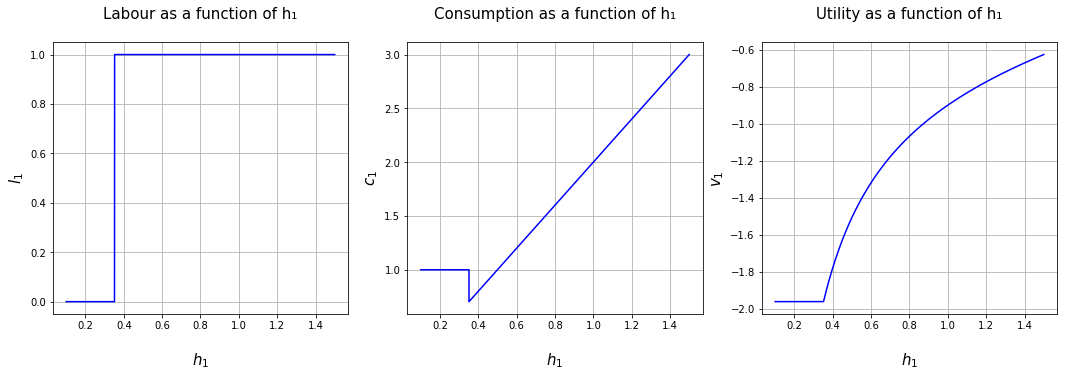

In [11]:
fig = plt.figure(figsize=(18,5))  # Initializes plot

ax1 = fig.add_subplot(1,3,1)      # Initializes first subplot
ax1.plot(h1_vec, l1_vec, 'b-')    # Plots the relevant series
ax1.set_xlabel('\n$h_1$', size=15)  # Labels x-axis and sets type size
ax1.set_ylabel('$l_1$', size=15)  # Labels y-axis and sets type size
ax1.grid()                        # Adds grids
ax1.set_title('Labour as a function of 'u'h\u2081\n', 
              size=15)            # Sets title and type size

ax2 = fig.add_subplot(1,3,2)      # Initializes second subplot
ax2.plot(h1_vec, c1_vec, 'b-')    # Plots the relevant series
ax2.set_xlabel('\n$h_1$', size=15)  # Labels x-axis and sets type size
ax2.set_ylabel('$c_1$', size=15)  # Labels y-axis and sets type size
ax2.grid()                        # Adds grids
ax2.set_title('Consumption as a function of 'u'h\u2081\n', 
              size=15)            # Sets title and type size

ax3 = fig.add_subplot(1,3,3)      # Initializes third subplot
ax3.plot(h1_vec, vf1_vec, 'b-')   # Plots the relevant series
ax3.set_xlabel('\n$h_1$', size=15)  # Labels x-axis and sets type size
ax3.set_ylabel('$v_1$', size=15)  # Labels y-axis and sets type size
ax3.grid()                        # Adds grids
ax3.set_title('Utility as a function of 'u'h\u2081\n',
              size=15)            # Sets title and type size

cutoff2 = np.where(l1_vec == 1)[0][0]        # Extracts cut-off value

print('She will work whenever 'u'h\u2081 ≥ ' 
      + str(round(h1_vec[cutoff2],4)) + '.') # Prints cut-off value
print('\nRevelant graphs of period 1 are shown below.')

Therefore, the worker chooses to work in period 1, if her level of human capital is greater than or equal to $0.3519$. Again, we see that her consumption as well as her utility is stricly increasing from this cut-off value and onwards.

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not. 

This can easily be answered by re-executing all of the code above, but with $b ≥ w$, i.e. benefits greater than or equal to work. For instance, if one changes $b$ to $2.1$, such that $b = 2.1 > 2 = w$, one will see that the worker will choose to work at certain (and relatively high) levels of human capital. This stems from the fact that the worker's level of consumption is multiplied by her level of human capital, which can be thought of as enchancing the utilization of resources and hence consumption. Since consumption is a vital part of the worker's value function, she will indeed work if her wage income is lower than the benefits - for certain levels of human capital.

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [12]:
par = {}

par['alpha'] = 5.76
par['h']     = 0.5
par['b']     = 0.5
par['phi']   = 0
par['gamma'] = 0.075
par['delta'] = 0.80
par['omega'] = 0.15

y_t    = sm.symbols('y_t')
y_t1   = sm.symbols('y_t-1')
v_t    = sm.symbols('v_t')
s_t    = sm.symbols('s_t')
s_t1   = sm.symbols('s_t-1')
i_t    = sm.symbols('i_t')
r_t    = sm.symbols('r_t')
alpha  = sm.symbols('alpha')
h      = sm.symbols('h')
b      = sm.symbols('b')
phi    = sm.symbols('phi')
gamma  = sm.symbols('gamma')
phi    = sm.symbols('phi')
pi_t   = sm.symbols('pi_t')
pi_t1  = sm.symbols('pi_t-1')
pie_t  = sm.symbols('pi^e_t')
pie_t1 = sm.symbols('pi^e_t-1')
pie_1t = sm.symbols('pi^e_t+1')

print('Parameters successfully set.')

Parameters successfully set.


**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

Below, we define and display all of the given equations.

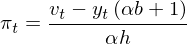

In [13]:
# Defines the given equations
sym_eq1 = sm.Eq(y_t, -alpha*r_t + v_t)
sym_eq2 = sm.Eq(i_t, pie_1t + h*pi_t + b*y_t)
sym_eq3 = sm.Eq(r_t, i_t - pie_1t)
sym_eq4 = sm.Eq(pi_t, 1/(h*alpha)*(v_t - (1 + b*alpha)*y_t))
sym_eq5 = sm.Eq(pi_t, pie_t + gamma*y_t + s_t)
sym_eq6 = sm.Eq(pie_t, phi*pie_t1 + (1-phi)*pi_t1)
sym_eq7 = sm.Eq(pi_t, pi_t1 + gamma*y_t - phi*gamma*y_t1 + s_t - phi*s_t1)

# Displays the equations nicely
display(sym_eq1,sym_eq2,sym_eq3,sym_eq4,sym_eq5,sym_eq6,sym_eq7)

# Note: The code below is used for 2.3.
# Here, we solve for pi and y through eq. 4 and 7 above
sol    = sm.solve([sym_eq4, sym_eq7], [y_t, pi_t])
pi_sol = sol[pi_t]
y_sol  = sol[y_t]

# Lambdifies functions of pi and y
pi_func = sm.lambdify((pi_t1, y_t1, v_t, s_t, s_t1, alpha, h, b, phi, gamma), pi_sol)
y_func  = sm.lambdify((pi_t1, y_t1, v_t, s_t, s_t1, alpha, h, b, phi, gamma), y_sol)

Now, we solve symbolically for AD and SRAS as functions of known parameters.

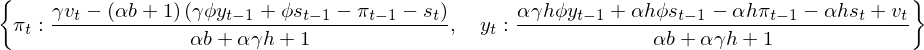

In [14]:
# Defines AD and SRAS
sym_AD   = sm.Eq(pi_t, 1/(h*alpha)*(v_t - (1 + b*alpha)*y_t))
sym_SRAS = sm.Eq(pi_t, pi_t1 + gamma*y_t - phi*gamma*y_t1 + s_t - phi*s_t1)

# Solves
sym_sol  = sm.solve([sym_AD, sym_SRAS], [y_t, pi_t])
sym_sol

Then, we do all of the above numerically. Here, we only display the solution for output, $y_t$, and inflation, $\pi_t$, in equilibrium.

In [15]:
# Defines the given equations with parameter values
num_eq1  = sm.Eq(y_t,   -par['alpha']*r_t + v_t)
num_eq2  = sm.Eq(i_t,   pie_1t + par['h']*pi_t + par['b']*y_t)
num_eq3  = sm.Eq(r_t,   i_t - pie_1t)
num_eq4  = sm.Eq(pi_t,  1/(par['h']*par['alpha'])*
             (v_t - (1 + par['b']*par['alpha'])*y_t))
num_eq5  = sm.Eq(pi_t,  pie_t + par['gamma']*y_t + s_t)
num_eq6  = sm.Eq(pie_t, phi*pie_t1 + (1-phi)*pi_t1)
num_eq7  = sm.Eq(pi_t,  pi_t1 + par['gamma']*y_t - par['phi']
             *par['gamma']*y_t1 + s_t - par['phi']*s_t1)

# Defines AD and SRAS
num_AD   = sm.Eq(pi_t,  1/(par['h']*par['alpha'])
             *(v_t - (1 + par['b']*par['alpha'])*y_t))
num_SRAS = sm.Eq(pi_t,  pi_t1 + par['gamma']*y_t - par['phi']
             *par['gamma']*y_t1 + s_t - par['phi']*s_t1)

# Solves
num_sol  = sm.solve([num_AD, num_SRAS], [y_t, pi_t])
num_sol

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

We set $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$ and solve for the equilibrium.

In [16]:
y_t1  = pi_t1 = v_t = s_t = s_t1 = 0 # Imposes condition

AD1   = sm.Eq(pi_t,  1/(par['h']*par['alpha'])
             *(v_t - (1 + par['b']*par['alpha'])*y_t))   # New AD
SRAS1 = sm.Eq(pi_t,  pi_t1 + par['gamma']*y_t - par['phi']
             *par['gamma']*y_t1 + s_t - par['phi']*s_t1) # New SRAS

sol1  = sm.solve([AD1, SRAS1], [y_t, pi_t]) # Solves

print('Successfully solved.')

Successfully solved.


Now, we set $v_t = 0.1$ and solve.

In [17]:
v_t_1 = 0.1 # Imposes new condition

AD2   = sm.Eq(pi_t,  1/(par['h']*par['alpha'])
             *(v_t_1 - (1 + par['b']*par['alpha'])*y_t)) # New AD
SRAS2 = sm.Eq(pi_t,  pi_t1 + par['gamma']*y_t - par['phi']
             *par['gamma']*y_t1 + s_t - par['phi']*s_t1) # New SRAS

sol2 = sm.solve([AD2, SRAS2], [y_t, pi_t]) # Solves

print('Successfully solved.')

Successfully solved.


Lastly, we plot the two set of equilibrium values and illustrate this in a graph.

Equilibrium values without shock:


Equilibrium values with shock:


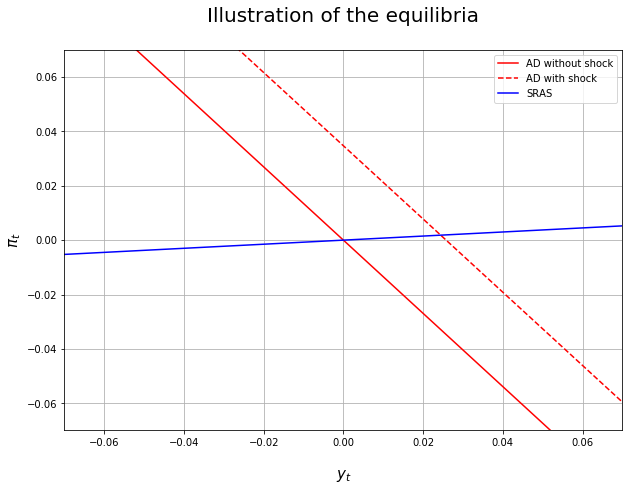

In [18]:
y = np.linspace(-1.0,1.0,1000)   # Creates the values of y

alpha     = par['alpha']
h         = par['h']
b         = par['b']
phi       = par['phi']
gamma     = par['gamma']
v_t       = par['v_t']       = 0
v_t_shock = par['v_t_shock'] = 0.1

def AD(y,h,b,alpha,v_t):             # Defines AD
    return 1/(h*alpha)*(v_t - (1 + b*alpha)*y)

def AD_shock(y,h,b,alpha,v_t_shock): # Defines AD with shock
    return 1/(h*alpha)*(v_t_shock - (1 + b*alpha)*y)

def SRAS(pi_t1,gamma,phi,y,y_t1,s_t,s_t1): # Defines SRAS
    return pi_t1 + gamma*y - phi*gamma*y_t1 + s_t - phi*s_t1

plt.figure(figsize=(10,7))        # Initializes plot
plt.xlim(left=-0.07, right=0.07)  # Sets x-axis limits
plt.ylim(bottom=-0.07, top=0.07)  # Sets y-axis limits
plt.grid()                        # Grids
plt.plot(y,AD(y,h,b,alpha,v_t),'r-')          # Plots AD
plt.plot(y,AD_shock(y,h,b,alpha,v_t_1),'r--') # Plots AD with shock
plt.plot(y,SRAS(pi_t1,gamma,phi,y,y_t1,s_t,s_t1),'b-') # Plots SRAS
plt.title('Illustration of the equilibria\n', size=20) # Sets title and type size
plt.xlabel('\n$y_t$', size=15)   # Labels x-axis and sets type size
plt.ylabel('$\pi_t$', size=15)   # Labels y-axis and sets type size
plt.legend(('AD without shock','AD with shock','SRAS'),
           loc='upper right')    # Creates legend

print('Equilibrium values without shock:') 
display(sol1) # Displays equilibrium w/o shock

print('Equilibrium values with shock:') 
display(sol2) # Displays equilibrium w shock

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [19]:
par['delta'] = 0.80
par['omega'] = 0.15

print('New parameters successfully set.')

New parameters successfully set.


**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

We start out by defining the demand and supply disturbances.

In [20]:
# Defines the two AR(1) processes
v_t1 = sm.symbols('v_t-1')
v_func = lambda v_t1,x: delta*v_t1 + x # Creates the function for v_t
s_func = lambda s_t1,c: omega*s_t1 + c # Creates the function for s_t

print('Success.')

Success.


Now, we impose neccessary conditions and create two empty arrays.

In [21]:
# Re-defines the parameters
delta = par['delta']
omega = par['omega']
alpha = par['alpha']
h     = par['h']
b     = par['b']
gamma = par['gamma']
phi   = par['phi']

# Imposes the conditions in t-1
pi_vec = [0] # Sets pi_-1 = 0
y_vec  = [0] # Sets y_-1  = 0
v_vec  = [0] # Sets v_-1  = 0
s_vec  = [0] # Sets s_-1  = 0

T = 100         # T number of periods
c = np.zeros(T) # Creates an array for c
x = np.zeros(T) # Creates an array for x

x[1]   = 0.1    # Sets x_0 = 0.1  
                # Note: x[0] = 0.1 messes up notation, hence x[1]

print('Success.')

Success.


Next, we create vectors for $y_{t}$ and $\pi_{t}$ based on the new disturbances.

In [22]:
for i in range(1,T):

    v_vec.append(v_func(v_vec[i-1], x[i])) # Updates the v vector
    s_vec.append(s_func(s_vec[i-1], c[i])) # Updates the s vector
     
    y_vec.append(y_func(pi_vec[i-1], y_vec[i-1], v_vec[i], s_vec[i], s_vec[i-1], alpha, h, b, phi, gamma))   # Creates the y vector 
    pi_vec.append(pi_func(pi_vec[i-1], y_vec[i-1], v_vec[i], s_vec[i], s_vec[i-1], alpha, h, b, phi, gamma)) # Creates the pi vector
    
# The two latter vectors shows the development og y and pi over time

print('Success.')

Success.


Finally, we plot the effects of the demand shock.

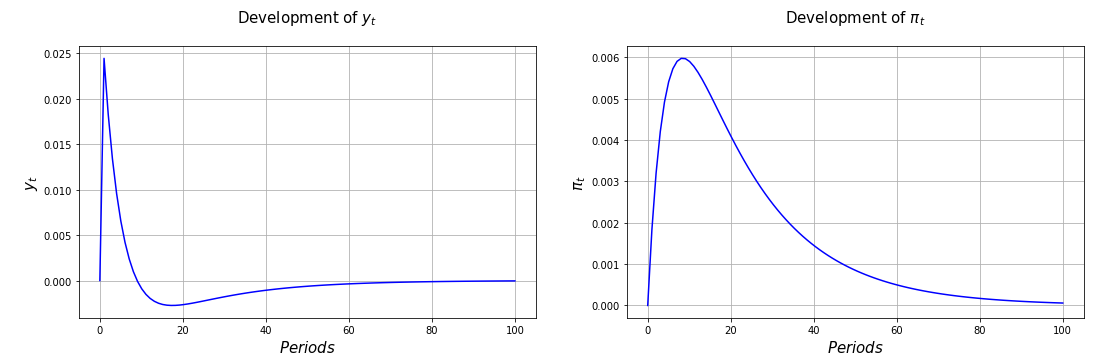

In [23]:
q   = np.linspace(0,T,T)             # Creates x-values based on periods T

fig = plt.figure(figsize=(18,5))     # Initializes plot

ax1 = fig.add_subplot(1,2,1)         # Initializes first subplot
ax1.plot(q, y_vec, 'b-')             # Plots the vector
ax1.set_ylabel('\n$y_t$', size=15)   # Labels x-axis and sets type size
ax1.set_xlabel('$Periods$', size=15) # Labels y-axis and sets type size
ax1.grid()                           # Adds grids
ax1.set_title('Development of $y_t$\n', 
              size=15)               # Sets title and type size

ax2 = fig.add_subplot(1,2,2)         # Initializes second subplot
ax2.plot(q, pi_vec, 'b-')            # Plots the vector
ax2.set_ylabel('\n$π_t$', size=15)   # Labels x-axis and sets type size
ax2.set_xlabel('$Periods$', size=15) # Labels y-axis and sets type size
ax2.grid()                           # Adds grids
ax2.set_title('Development of $π_t$\n', 
              size=15)               # Sets title and type size

plt.show()

Above, we see that the demand shock temporarily creates a postive output and positive inflation gap. Both diminish and tend to zero over time, but while the inflation gap never becomes negative, the output gap does.

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [24]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

print('New shocks successfully set.')

New shocks successfully set.


**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

To simulate the AS-AD model as requested, we create the neccessary vectors for $y_t$ and $\pi_t$ over a time span of 1.000 periods.

In [25]:
np.random.seed(1995)                                # Sets seed no.
Time    = T*10                                      # Sets amount of period to T * 10 = 1000
sigma_x = par['sigma_x']                            # Defines the parameter 
sigma_c = par['sigma_c']                            # Defines the parameter
x = np.random.normal(loc=0,scale=sigma_x,size=Time) # Creates x as a std. norm. dist. with 0 as mean and (sigma_x)**2 as var.
c = np.random.normal(loc=0,scale=sigma_c,size=Time) # Creates c as a std. norm. dist. with 0 as mean and (sigma_c)**2 as var.

def sim1(Time, phi_custom): # Defines a function that simulates the model
    
    pi_vec1 = [0]           # Setting pi_-1 to 0
    y_vec1  = [0]           # Setting y_-1 to 0
    v_vec1  = [0]           # Setting v_-1 to o
    s_vec1  = [0]           # Setting s_-1 to 0

    for i in range(1,Time): # Runs the simulation up til period Time

        v_vec1.append(v_func(v_vec1[i-1], x[i])) # Updtaes v_vector
        s_vec1.append(s_func(s_vec1[i-1], c[i])) # Updates s_vector       

        y_vec1.append(y_func(pi_vec1[i-1], y_vec1[i-1], v_vec1[i], s_vec1[i], s_vec1[i-1], alpha, h, b, phi_custom, gamma))   # Creates vector for y
        pi_vec1.append(pi_func(pi_vec1[i-1], y_vec1[i-1], v_vec1[i], s_vec1[i], s_vec1[i-1], alpha, h, b, phi_custom, gamma)) # Creates vector for pi

    pi_vec1 = np.array(pi_vec1) # Converts the pi_vector to a numpy array 
    y_vec1 = np.array(y_vec1)   # Converts the y_vector to a numpy array 
        
    return pi_vec1, y_vec1

pi_vec1, y_vec1 = sim1(Time, phi)

print('Successful.')

Successful.


Below, we print the results. We print the results seperately, so we do not overwrite the vectors above.

In [26]:
print('The variance of y\u209c: ' + f'{y_vec1.var():.2f}')
print('The variance of π\u209c: ' + f'{pi_vec1.var():.2f}')
print(f'\nThe correlation between y\u209c and π\u209c: {np.corrcoef(y_vec1, pi_vec1)[1,0]:.2f}')
print(f'\nThe auto-correlation between y\u209c and y\u209c-1: {np.corrcoef(y_vec1[1:], y_vec1[:-1])[1,0]:.2f}')
print(f'The auto-correlation between π\u209c and π\u209c-1: {np.corrcoef(pi_vec1[1:], pi_vec1[:-1])[1,0]:.2f}')

The variance of yₜ: 1.82
The variance of πₜ: 0.84

The correlation between yₜ and πₜ: -0.15

The auto-correlation between yₜ and yₜ-1: 0.77
The auto-correlation between πₜ and πₜ-1: 0.98


**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

Firstly, we create the relevant series to plot, i.e. the given correlation as a function of $\phi$.

In [27]:
phies = np.linspace(0,1,100) # Creates different values for phi

pi_dict = {}                 # Creates a dict. for pi to store results from the simualtions for diff. phi values
y_dict = {}                  # Creates a dict. for y to store results from the simualtions for diff. phi values
corr = []                    # Creates a list for the correlations

for i,p in enumerate(phies): # Creates a for loop for the phies
    pi_dict['pi_vec2_%s' % i], y_dict['y_vec2_%s' % i] = sim1(Time, phies[i])
    corr.append(np.corrcoef(y_dict['y_vec2_%s' %i], pi_dict['pi_vec2_%s' % i])[1,0])

print('Successful.')

Successful.


We then plot the correlation.

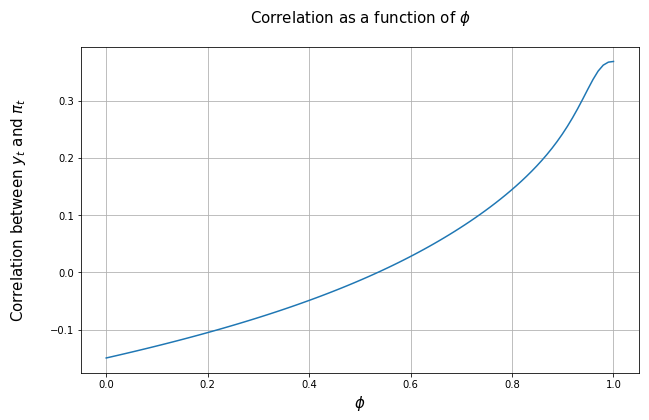

In [28]:
fig = plt.figure(figsize=(10,6))    # Initializes plot
plt.plot(phies, corr) # Plots the relevant series
plt.ylabel('Correlation between $y_t$ and $\pi_t$\n',
          size=15)    # Labels y-axis and sets type size
plt.xlabel('$\phi$',  # Labels x-axis and sets type size
          size=15)
plt.title('Correlation as a function of $\phi$\n',
         size=15)     # Sets title and type size
plt.grid()            # Adds grids

plt.show()

We see that the $\phi$-value needs to be around 0.95 to obtain the requested correlation. However, to calculate the exact value, we now perform a bisection procedure.

In [29]:
obj_func1 = lambda phi: np.corrcoef(sim1(Time, # Defines the objective function
                    phi)[0], sim1(Time, phi)[1])[1,0] - 0.31

def bisection(obj_func1,a,b,tol=1e-8):        #Creates a bisection function

    # Test inputs
    if obj_func1(a) * obj_func1(b) >= 0:
        print("Bisection method fails.")
        return None
    
    # Step 1: Initializes
    a_n = a
    b_n = b
    
    # Step 2-4:
    while True:
        
        # Step 2: Midpoint and associated value
        m_n = (a_n+b_n)/2
        f_m_n = obj_func1(m_n)
        
        # Step 3: Determine sub-interval
        if abs(f_m_n) < tol:
            return m_n
        elif obj_func1(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif obj_func1(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2

phi_sol = bisection(obj_func1,0,1,1e-8) # Uses function to find desired value

print('Bisection successful.')

Bisection successful.


Finally, we print the result.

In [30]:
print(f'The solution is a Φ-value of '+ str(round(phi_sol,5)) + '.')

The solution is a Φ-value of 0.94369.


Thus, the exact value is about 0.94, which is in accordance with the plot.

**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

We create the following simulation function as to match the desired and observed values above.

In [31]:
def sim2(Time, phi_custom, sigma_x, sigma_c): # Defines a function for the simulation of the model with a stochastic process

    # Defines stochastic process inside function
    xx = np.random.normal(loc=0,scale=sigma_x,size=Time) # Creates the stochastics for x
    cc = np.random.normal(loc=0,scale=sigma_c,size=Time) # Creates the stochastics for c
    
    pi_vec2 = [0]                             # Sets pi_-1 = 0
    y_vec2  = [0]                             # Sets y_-1 = 0
    v_vec2  = [0]                             # Sets v_-1 = 0
    s_vec2  = [0]                             # Sets s_-1 = 0

    for t in range(1,Time):                   # Runs the simulation from t to T=Time

        v_vec2.append(v_func(v_vec2[t-1], xx[t])) # Updates v_vector
        s_vec2.append(s_func(s_vec2[t-1], cc[t])) # Updates s_vector
 
        y_vec2.append(y_func(pi_vec2[t-1], y_vec2[t-1],v_vec2[t], s_vec2[t], s_vec2[t-1], alpha, h, b, phi_sol, gamma))
        pi_vec2.append(pi_func(pi_vec2[t-1], y_vec2[t-1], v_vec2[t], s_vec2[t], s_vec2[t-1], alpha, h, b, phi_sol, gamma))

    pi_vec2 = np.array(pi_vec2)                # Creates a numpy array of the vector for pi
    y_vec2 = np.array(y_vec2)                  # Creates a numpy array of the vector for y
        
    return pi_vec2, y_vec2

parametros = [phi, sigma_x, sigma_c]           # Defines a vector of the parameters

var_y    = np.var(sim2(Time, parametros[0], parametros[1], parametros[2])[1]) - 1.64   # Creates the constraint for the variance of y
var_pi   = np.var(sim2(Time, parametros[0], parametros[1], parametros[2])[0]) - 0.21   # Creates the constraint for the variance of pi
corr_ypi = np.corrcoef(sim2(Time, parametros[0], parametros[1], parametros[2])[0],     # Creates the constraint for correlation of y_t and pi_t
                       sim2(Time, parametros[0], parametros[1], parametros[2])[1])[1,0] - 0.31
corr_y   = np.corrcoef(sim2(Time, parametros[0], parametros[1], parametros[2])[1][1:], # Creates the constraint for the correlation of y_t and y_t-1
                     sim2(Time, parametros[0], parametros[1], parametros[2])[1][:-1])[1,0] - 0.84
corr_pi  = np.corrcoef(sim2(Time, parametros[0], parametros[1], parametros[2])[0][1:], # Creates the constraint for the correlation of pi_t and p_t-1
                      sim2(Time, parametros[0], parametros[1], parametros[2])[0][:-1])[1,0] - 0.48

limits = [[0,1], [0,50], [0,50]]               # Defines a vector of bounds

x0     = np.array([phi_sol, sigma_x, sigma_c]) # Sets initial values equal to the found values

obj_func2   = lambda parametros: var_y + var_pi + corr_ypi + corr_y + corr_pi
result = optimize.minimize(obj_func2, x0=x0, bounds=limits,  method='SLSQP')

phi_sol = round(x0[0],4)
sigma_x_sol = round(x0[1],4)
sigma_c_sol = round(x0[2],4)

print(f'The solution is Φ = {phi_sol},  σ_x = {sigma_x_sol} and σ_c = {sigma_c_sol}.')

The solution is Φ = 0.9437,  σ_x = 3.492 and σ_c = 0.2.


# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [32]:
# Parameters
N      = 50000
mu     = np.array([3,2,1])
Sigma  = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma  = 0.8
zeta   = 1

# Random draws
seed   = 1986
np.random.seed(seed)

# Preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas  = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# Endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

print('Parameters, random preferences and endowments successfully set.')

Parameters, random preferences and endowments successfully set.


**Question 1:** Plot the histograms of the budget shares for each good across agents.

Firstly, we extracts the budget shares one by one.

In [33]:
np.shape(betas)     # Shape of vector of betas, (50000, 3)

# Extracts
betas1 = betas[:,0] # Share of good 1
betas2 = betas[:,1] # Share of good 2
betas3 = betas[:,2] # Share of good 3

print('Extracting successful.')

Extracting successful.


Then, we plot these in histograms.

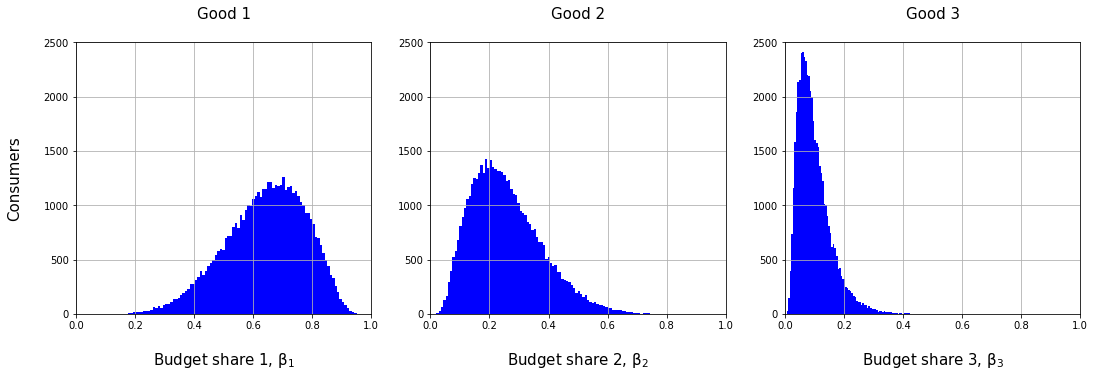

In [34]:
fig = plt.figure(figsize=(18,5))   # Initializes plot

ax1 = fig.add_subplot(1,3,1)       # Initializes first subplot
ax1.hist(betas1, bins=100, color=['blue']) # Plots the relevant series
ax1.set_xlim(0,1)                  # Sets limits on x-axis
ax1.set_ylim(0,2500)               # Sets limits on y-axis
ax1.set_title('Good 1\n', size=15) # Sets title and type size
ax1.set_xlabel('\nBudget share 1, \u03B2$_{1}$',
               size=15)            # Labels x-axis and sets type size
ax1.set_ylabel('Consumers\n',
               size=15)            # Labels x-axis and sets type size
ax1.grid()                         # Adds grids

ax2 = fig.add_subplot(1,3,2)       # Initializes second subplot
ax2.hist(betas2, bins=100, color=['blue']) # Plots the relevant series
ax2.set_xlim(0,1)                  # Sets limits on x-axis
ax2.set_ylim(0,2500)               # Sets limits on y-axis
ax2.set_title('Good 2\n', size=15) # Sets title and type size
ax2.set_xlabel('\nBudget share 2, \u03B2$_{2}$',
               size=15)            # Labels x-axis and sets type size
ax2.grid()                         # Adds grids

ax3 = fig.add_subplot(1,3,3)       # Initializes third subplot 
ax3.hist(betas3, bins=100, color=['blue']) # Plots the relevant series
ax3.set_xlim(0,1)                  # Sets limits on x-axis
ax3.set_ylim(0,2500)               # Sets limits on y-axis
ax3.set_title('Good 3\n', size=15) # Sets title and type size
ax3.set_xlabel('\nBudget share 3, \u03B2$_{3}$',
               size=15)            # Labels x-axis and sets type size
ax3.grid()                         # Adds grids

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

We define three demand functions - one for each good. We remember that $p_3 = 1$.

In [35]:
def demand_good1(p1,p2,e1,e2,e3,betas): # Demand function of good 1
    I = e1*p1 + e2*p2 + e3              # Income, p3=1
    return betas[:,0]*I/p1              # Demand output

def demand_good2(p1,p2,e1,e2,e3,betas): # Demand function of good 2
    I = e1*p1 +e2*p2 + e3               # Income, p3=1
    return betas[:,1]*I/p2              # Demand output

def demand_good3(p1,p2,e1,e2,e3,betas): # Demand function of good 3
    I = e1*p1 + e2*p2 + e3              # Income, p3=1
    return betas[:,2]*I                 # Demand output, p3=1

print('Defining successful.')

Defining successful.


Next, we define three excess demand functions - one for each good, of course.

In [36]:
def excess_g1(p1,p2,e1,e2,e3,betas): # Excess fuction of good 1
    demand = np.sum(demand_good1(p1,p2,e1,e2,e3,betas)) # Total demand
    supply = np.sum(e1)                                 # Total supply
    excess = demand-supply           # Difference = excess
    return excess

def excess_g2(p1,p2,e1,e2,e3,betas): # Excess fuction of good 2
    demand = np.sum(demand_good2(p1,p2,e1,e2,e3,betas)) # Total demand
    supply = np.sum(e2)                                 # Total supply
    excess = demand-supply           # Difference = excess
    return excess

def excess_g3(p1,p2,e1,e2,e3,betas): # Excess fuction of good 3
    demand = np.sum(demand_good3(p1,p2,e1,e2,e3,betas)) # Total demand
    supply = np.sum(e3)                                 # Total supply
    excess = demand-supply           # Difference = excess
    return excess

print('Defining successful.')

Defining successful.


Now, we prepare the grids for the plot. We create two vectors, one for $p_1$ and one for $p_2$, and then create the corresponding values of the excess demand of good 1 and 2 for every price combination of $p_1$ and $p_2$. Again, we remember that $p_3 = 1$.

In [37]:
excess_g1_grid = np.empty((100,100)) # Creates empty grid for excess demand of good 1
excess_g2_grid = np.empty((100,100)) # Creates empty grid for excess demand of good 2

p1s = p2s = np.linspace(1,10,100)    # Creates vectors of p1 and p2

p1_grid, p2_grid = np.meshgrid(p1s, p2s) # Transforms vectors to grid

# Calculates excess demand for every combination of prices
for i,p1     in enumerate(p1s):
    for j,p2 in enumerate(p2s):
        excess_g1_grid[i,j] = excess_g1(p1,p2,e1,e2,e3,betas)
        excess_g2_grid[i,j] = excess_g2(p1,p2,e1,e2,e3,betas)

print('Successful.')

Successful.


Now, we plot both excess demand functions for good 1 and good 2, respectively.

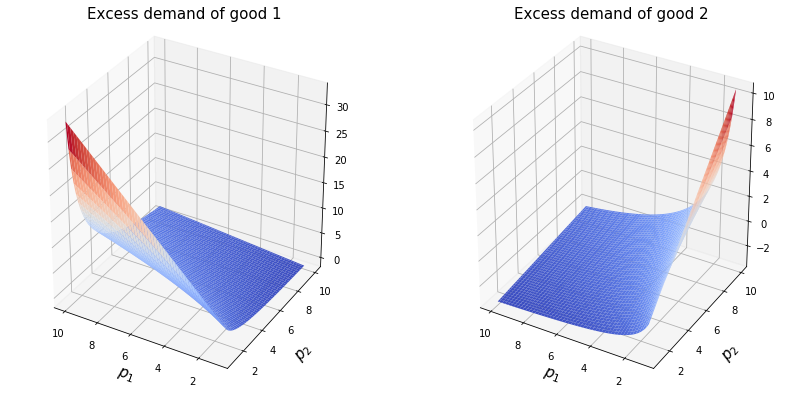

In [38]:
fig = plt.figure(figsize=(14,7))              # Initializes plot

ax1 = fig.add_subplot(1,2,1, projection='3d') # Initializes first subplot
ax1.plot_surface(p1_grid,p2_grid,             # Plots the relevant series
                 excess_g1_grid/10000,cmap=cm.coolwarm) # Downscales the z-axis and adds cold/warm scale
ax1.set_title('Excess demand of good 1\n', size=15)     # Sets title and type size
ax1.set_xlabel('$p_1$',   size=15) # Labels x-axis and sets type size
ax1.set_ylabel('\n$p_2$', size=15) # Labels y-axis and sets type size
ax1.invert_xaxis()                 # Creates increasing x-axis

ax2 = fig.add_subplot(1,2,2, projection='3d') # Initializes second subplot
ax2.plot_surface(p1_grid,p2_grid,             # Plots the relevant series
                 excess_g2_grid/10000,cmap=cm.coolwarm) # Downscales the z-axis and adds cold/warm scale
ax2.set_title('Excess demand of good 2\n', size=15)     # Sets title and type size
ax2.set_xlabel('$p_1$',   size=15) # Labels x-axis and sets type size
ax2.set_ylabel('\n$p_2$', size=15) # Labels y-axis and sets type size
ax2.invert_xaxis()                 # Creates increasing x-axis

plt.show()

Both plots clearly show that the excess demand of the given good rises, when its price increases and the other good's price decreases. This is in accordance to what one could expect.

**Question 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

Below, we set up the tâtonnement process as described above.

In [39]:
def tat(p1,p2,e1,e2,e3,betas,epsilon=0.0001,kappa=0.5,prints=True): # Defines tat process

    # 1. Calculates initial excess of good 1 and good 2
    g_1 = excess_g1(p1,p2,e1,e2,e3,betas)
    g_2 = excess_g2(p1,p2,e1,e2,e3,betas)
    if prints: # Prints initial excesses and prices
        print(f'Initial values{" ":5s}: Excess of good 1 = {g_1:.3f}, Excess of good 2 = {g_2:.3f} with p\u2081 = {p1:.2f} and p\u2082 = {p2:.2f} \n')
    
    # Sets first iteration
    t = 1
    
    # While-loop with 10.000 iterations,
    # should be sufficient for any set of price guesses
    while t < 10000:
        
        # 2. Calculates initial excess of good 1 and good 2
        g_1 = excess_g1(p1,p2,e1,e2,e3,betas)
        g_2 = excess_g2(p1,p2,e1,e2,e3,betas)

        # 3. Checks whether excess demands are below epsilon level
        if abs(g_1) < epsilon and abs(g_2) < epsilon:
            if prints:
                print(f'\nPrices in the Walrasian equilibrium are p\u2081 = {p1:.4f} and p\u2082 = {p2:.4f}.')
            p1_we = p1
            p2_we = p2
            return p1_we, p2_we # we = Walras equilibrium
              
        else:
        # 4. If epsilon is not reached,
            p1 += kappa*g_1/N # p1 is adjusted with kappa-adjustment
            p2 += kappa*g_2/N # and p2 is adjusted with kappa-adjustment as well
 
        if prints: # Prints iteration process 
            if t <= 3:
                print(f'Iteration no. {t:5.0f}: Excess of good 1 = {g_1:7.3f}, Excess of good 2 = {g_2:7.3f} with p\u2081 = {p1:.2f} and p\u2082 = {p2:.2f}')
                time.sleep(1)

            if t == 3:
                print('...')

            if t%250 == 0:
                print(f'Iteration no. {t:5.0f}: Excess of good of 1 = {g_1:7.3f}, Excess of good 2 = {g_2:7.3f} with p\u2081 = {p1:.2f} and p\u2082 = {p2:.2f}')

        # Updates counter
        t += 1
        
    # Prints if max no. of iterations reached
    if t == 10000: 
        print('Too many iterations required.')
        return None, None
              
print('Tâtonnement process successfully set.')

Tâtonnement process successfully set.


Now, we start the iteration process with guesses of $p_1=7$ and $p_1=3$.

In [40]:
p1 = 7 # Price guess of p1
p2 = 3 # Price guess of p2

p1_we, p2_we = tat(p1,p2,e1,e2,e3,betas) # Starts tâtonnement process

Initial values     : Excess of good 1 = 449.086, Excess of good 2 = -2524.908 with p₁ = 7.00 and p₂ = 3.00 

Iteration no.     1: Excess of good 1 = 449.086, Excess of good 2 = -2524.908 with p₁ = 7.00 and p₂ = 2.97
Iteration no.     2: Excess of good 1 = 322.259, Excess of good 2 = -2213.885 with p₁ = 7.01 and p₂ = 2.95
Iteration no.     3: Excess of good 1 = 213.030, Excess of good 2 = -1939.915 with p₁ = 7.01 and p₂ = 2.93
...
Iteration no.   250: Excess of good of 1 = -57.328, Excess of good 2 = -21.384 with p₁ = 6.55 and p₂ = 2.64
Iteration no.   500: Excess of good of 1 =  -5.891, Excess of good 2 =  -2.198 with p₁ = 6.50 and p₂ = 2.62
Iteration no.   750: Excess of good of 1 =  -0.596, Excess of good 2 =  -0.222 with p₁ = 6.49 and p₂ = 2.62
Iteration no.  1000: Excess of good of 1 =  -0.060, Excess of good 2 =  -0.022 with p₁ = 6.49 and p₂ = 2.62
Iteration no.  1250: Excess of good of 1 =  -0.006, Excess of good 2 =  -0.002 with p₁ = 6.49 and p₂ = 2.62
Iteration no.  1500: Exces

In this case, it takes about 1.500 iterations before the Walrasian equilibrium is reached with a tolerance level of $\epsilon=0.0001$ and kappa adjustment of $\kappa=0.5$. In addition, we remember that if the market for good 1 and good 2 both clear, the last and third market automatically clears as well, cf. Walrasian theory.

**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

We start by defining the utility function of consumer $j$.

In [41]:
def util(p1, p2, e1, e2, e3, betas, gamma): # Defines utility
    I = p1*e1 + p2*e2 + e3  # Calculates income
    
    x_1 = betas[:,0]*(I/p1) # Demand of good 1
    x_2 = betas[:,1]*(I/p2) # Demand of good 2
    x_3 = betas[:,2]*I      # Demand of good 3
    
    # Calculates utility
    u = (x_1**(betas[:,0]) + x_2**(betas[:,1]) + x_3**(betas[:,2]))**gamma
    return u

Next, we plot the distribution of utility values.

The distribution has a mean of 2.376 with variance 0.208.


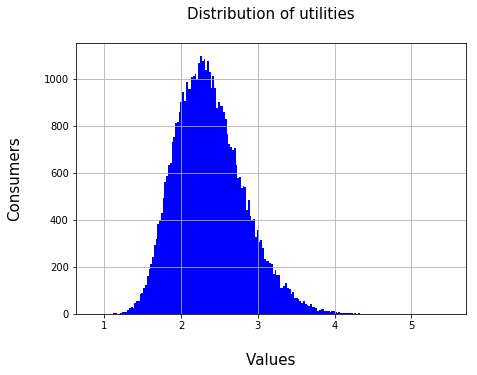

In [42]:
utility = util(p1_we, p2_we, e1, e2, e3, betas, gamma) # Calls vector of utilities

mean = np.mean(utility) # Calculates mean
var  = np.var(utility)  # Calculates variance

fig  = plt.figure(figsize=(7,5))   # Initializes plot

plt.hist(utility, bins=200, color=['blue']) # Plots the relevant series
plt.title('Distribution of utilities\n', size=15)  # Sets title and type size
plt.xlabel('\nValues', size=15)    # Labels x-axis and sets type size
plt.ylabel('Consumers\n', size=15) # Labels y-axis and sets type size
plt.grid()                         # Adds grids

print(f'The distribution has a mean of {mean:.3f} with variance {var:.3f}.')

**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

We define the new set of endowments and then solve for the new equilibrium set of prices.

In [43]:
# Sets new set of endowments, equal to mean of each initial endowment
e1_new = np.mean(e1) + np.zeros(N)
e2_new = np.mean(e2) + np.zeros(N)
e3_new = np.mean(e3) + np.zeros(N)

p1_we_new, p2_we_new = tat(p1,p2,e1_new,e2_new,e3_new,betas) # Solves with the tâtonnement process

p1_diff = (p1_we_new - p1_we)
p2_diff = (p2_we_new - p2_we)

print(f'\nDifference in p\u2081 compared to previues equilibrium: {p1_diff:.4f}')
print(f'Difference in p\u2082 compared to previues equilibrium:  {p2_diff:.4f}')

Initial values     : Excess of good 1 = 434.647, Excess of good 2 = -2498.187 with p₁ = 7.00 and p₂ = 3.00 

Iteration no.     1: Excess of good 1 = 434.647, Excess of good 2 = -2498.187 with p₁ = 7.00 and p₂ = 2.98
Iteration no.     2: Excess of good 1 = 309.407, Excess of good 2 = -2190.614 with p₁ = 7.01 and p₂ = 2.95
Iteration no.     3: Excess of good 1 = 201.563, Excess of good 2 = -1919.756 with p₁ = 7.01 and p₂ = 2.93
...
Iteration no.   250: Excess of good of 1 = -57.575, Excess of good 2 = -21.507 with p₁ = 6.55 and p₂ = 2.64
Iteration no.   500: Excess of good of 1 =  -5.897, Excess of good 2 =  -2.203 with p₁ = 6.49 and p₂ = 2.62
Iteration no.   750: Excess of good of 1 =  -0.595, Excess of good 2 =  -0.222 with p₁ = 6.49 and p₂ = 2.62
Iteration no.  1000: Excess of good of 1 =  -0.060, Excess of good 2 =  -0.022 with p₁ = 6.49 and p₂ = 2.62
Iteration no.  1250: Excess of good of 1 =  -0.006, Excess of good 2 =  -0.002 with p₁ = 6.49 and p₂ = 2.62
Iteration no.  1500: Exces

Compared to the previous equilibrium, we see that the price of good 1 slightly decreases, while the price of good 2 slightly increases. Now, we plot the distribution of the utility values:

In [44]:
def fig(𝛾):
    # Calculates utilities
    utility_new = util(p1_we_new, p2_we_new, e1_new, e2_new, e3_new, betas, 𝛾)
    utility     = util(p1_we, p2_we, e1, e2, e3, betas, 𝛾)

    mean_new = np.mean(utility_new)  # Calculates mean
    var_new  = np.var(utility_new)   # Calculates variance
    mean     = np.mean(utility)      # Calculates mean
    var      = np.var(utility)       # Calculates mean

    fig = plt.figure(figsize=(14,7)) # Initializes plot
    
    ax1 = fig.add_subplot(1,2,1)           # Initializes first subplot
    ax1.hist(utility_new, bins=200, color=['blue']) # Plots the relevant series
    ax1.set_title('a. Equally distributed endowments\n', size=15) # Sets title and type size
    ax1.set_xlabel('\nValues', size=15)    # Labels x-axis and sets type size
    ax1.set_ylabel('Consumers\n', size=15) # Labels y-axis and sets type size
    ax1.grid()                             # Adds grids
    
    ax2 = fig.add_subplot(1,2,2)           # Initializes second subplot
    ax2.hist(utility, bins=200, color=['blue']) # Plots the relevant series
    ax2.set_title('b. Exponentially distributed endowments\n', size=15) # Sets title and type size
    ax2.set_xlabel('\nValues', size=15)    # Labels x-axis and sets type size
    ax2.grid()                             # Adds grids
    
    plt.show()
    
    print(f'Panel a: The distribution has a mean of {mean_new:.3f} with variance of {var_new:.3f}.\n')
    print(f'Panel b: The distribution has a mean of {mean:.3f} with variance of {var:.3f}.')

widgets.interact(fig,
                𝛾 = widgets.FloatSlider(min=0.5, max=1.5, step=0.05, value=0.8))


interactive(children=(FloatSlider(value=0.8, description='γ', max=1.5, min=0.5, step=0.05), Output()), _dom_cl…

<function __main__.fig(γ)>

When endowments are equally distributed, the mean of the utilies hightens slightly, while the variance lowers significantly. Furthermore, when the 𝛾 parameter from the consumer $j$'s utility function increases, we see that the means and variances rise. For all 𝛾's, the mean of the equally distributed endowments remains higher, while its variance remains lower.